In [44]:
import pickle
import pandas as pd
import numpy as np
import itertools
from tqdm import tqdm_notebook
from multiprocessing import Process
from operator import itemgetter
from sklearn import linear_model
import sklearn.metrics as metrics
from random import shuffle
import matplotlib.pyplot as plt


In [2]:
data_directory = 'D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle'
df = pickle.load(open(data_directory, 'rb'))

shortable = pd.read_csv('C:/Users/Billy/Documents/PRISMO/data/ASX/shortable.csv',header=None)
df = df.xs('CLOSE',axis=1,level=1)

#Define the spread
p = 3

In [3]:
shortableStonks = [x + '.AX' for x in list(shortable[0])]

In [18]:
pairs = [pair for pair in itertools.permutations(shortableStonks,2)]

In [19]:
shuffle(pairs)

In [20]:
global results
results = []
def regression_results(y_true, y_pred):

    r2=metrics.r2_score(y_true, y_pred)
    
    return r2

for pair in tqdm_notebook(pairs):
    try:
        assetA = pair[0]
        assetB = pair[1]
        df_ = df[[assetA,assetB]].dropna()
        dfA = df_[assetA]
        dfB = df_[assetB]
        index = 0
        X = []
        Y = []
        while index < min([len(dfA),len(dfB)])-p-1:
            sublistA = list(dfA[index:index+p+1])
            sublistB = list(dfB[index:index+p+1])

            sublistAz = [z/sublistA[0] for z in sublistA]
            sublistBz = [z/sublistB[0] for z in sublistB]

            Zspread = [a-b for a,b in zip(sublistAz, sublistBz)]

            X.append([1]+Zspread[:-1])
            Y.append(Zspread[-1])

            index+=1

        X = np.matrix(X)
        Y = np.matrix(Y).T
        
        regr = linear_model.LinearRegression()
        regr.fit(X,Y)
        predicted = regr.predict(X)
        r_2 = regression_results(Y,predicted)

        results.append([assetA,assetB, r_2])
    except Exception as e:
        print(e)

"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['PRN.AX'] not in index"
"['PRN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['PRN.AX'] not in index"
"['SUN.AX'] not in index"
"['PRN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['PRN.AX'] not in index"
"['SUN.AX'] not in index"
"['PRN.AX'] not in index"
"['PRN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['PRN.AX'] not in index"
"['SUN.AX'] not in index"
"['PRN.AX'] not in index"
"['PRN.AX'] not in index"
"['PRN.AX'] not in index"
"['PRN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"
"['SUN.AX'] not in index"


KeyboardInterrupt: 

In [25]:
pairs_AR = sorted(results, key=itemgetter(2), reverse=True)

In [28]:
pairs_AR

[['BRG.AX', 'COL.AX', 0.7515937597830697],
 ['ALQ.AX', 'COL.AX', 0.7395266050272],
 ['ALX.AX', 'WBC.AX', 0.72871608713783],
 ['COL.AX', 'IAG.AX', 0.7239585395540462],
 ['NWL.AX', 'CMW.AX', 0.7238664965222896],
 ['NWL.AX', 'URW.AX', 0.7232600377040622],
 ['NWL.AX', 'QBE.AX', 0.7216388563822556],
 ['GPT.AX', 'BWP.AX', 0.7207997820198573],
 ['CWY.AX', 'WHC.AX', 0.7196859854419144],
 ['NWL.AX', 'NCM.AX', 0.719343173208767],
 ['NWL.AX', 'TWE.AX', 0.7179996209499557],
 ['GOZ.AX', 'COL.AX', 0.7168023313096776],
 ['PMV.AX', 'CWY.AX', 0.716567354759682],
 ['NWL.AX', 'ABC.AX', 0.7158640153590036],
 ['ALX.AX', 'SUL.AX', 0.7150819696646569],
 ['ANZ.AX', 'COL.AX', 0.7144136350750414],
 ['NUF.AX', 'ALX.AX', 0.7128207917909362],
 ['TNE.AX', 'COL.AX', 0.7115172203644856],
 ['CWY.AX', 'SGM.AX', 0.7108458692907533],
 ['FBU.AX', 'GPT.AX', 0.7107755836131431],
 ['GMG.AX', 'WBC.AX', 0.7105225267458073],
 ['SKI.AX', 'ALX.AX', 0.7100647765126054],
 ['ALX.AX', 'SGM.AX', 0.7100388842558907],
 ['AMC.AX', 'GMG.A

In [81]:
#Autoregressive Training

toTrade = pairs_AR[2][:2]
index = 0
df_temp = df[toTrade].dropna()
test_ratio = 0.2
X = []
Y = []
while index < int((1-test_ratio)*len(df_temp))-p-1:
            index_ = df_temp.iloc[index+p,].name
            sublistA = list(df_temp[toTrade[0]][index:index+p+1])
            sublistB = list(df_temp[toTrade[1]][index:index+p+1])

            sublistAz = [z/sublistA[0] for z in sublistA]
            sublistBz = [z/sublistB[0] for z in sublistB]

            Zspread = [a-b for a,b in zip(sublistAz, sublistBz)]
            #Want to omit the zero value in the first element. It makes the matrix X.T * X singular
            X.append([1]+Zspread[:-1])
            Y.append(Zspread[-1])
            index+=1



In [82]:
X = np.matrix(X)
Y = np.matrix(Y).T

In [90]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)
predicted = regr.predict(X)
r_2 = regression_results(Y,predicted)

In [92]:
r_2

0.7293520674691308

In [108]:
#Autoregressive Prediction

toTrade = pairs_AR[2][:2]
index = int((1-test_ratio)*len(df_temp))
df_temp = df[toTrade].dropna()
test_ratio = 0.2
X_test = []
Y_test = []
Y_predicted = []
while index < len(df_temp)-p-1:
            index_ = df_temp.iloc[index+p,].name
            sublistA = list(df_temp[toTrade[0]][index:index+p+1])
            sublistB = list(df_temp[toTrade[1]][index:index+p+1])

            sublistAz = [z/sublistA[0] for z in sublistA]
            sublistBz = [z/sublistB[0] for z in sublistB]

            Zspread = [a-b for a,b in zip(sublistAz, sublistBz)]
            #Want to omit the zero value in the first element. It makes the matrix X.T * X singular
            X_test.append([1]+Zspread[:-1])
            Y_test.append(Zspread[-1])
            Y_predicted.append((regr.predict(np.matrix(X_test[-1])))[0][0])
            index+=1

In [112]:
last = X_test[0]
predicted =(regr.predict(np.matrix(last)))[0][0] + np.random.normal(scale = )

In [111]:
regression_results(Y_test,Y_predicted)

0.7231870888351102

AR Trading strategy Psuedocode:

for row in priceHistory:
    AR_mean, AR_std = parameter_update(row)
    

In [75]:
selected = None
i = 1
while selected is None or len(selected)<=20:
    for pair in sorted(results, key=itemgetter(2))[-i:]:
        if selected is None:
            selected = []
            selected.append(pair)
        else:
            if all([pair[0] not in x[:2] for x in selected]) and all([pair[1] not in x[:2] for x in selected]):
                selected.append(pair)
    print(len(selected))

    i+=1
        

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17


In [ ]:
selected

In [77]:
pairs_AR = sorted(selected, key=itemgetter(2))

In [52]:
cores = 8
i=0
batches = []
while (i+1)*cores<len(pairs):
    batches.append(pairs[i*cores:(i+1)*cores])
    i+=1

for batch in batches:
    processes = []
    for pair in batch:
        process = Process(target = fitModel, args=(pair , df))
        processes.append(process)
        process.start()
    for process in processes:
        process.join()

BrokenPipeError: [Errno 32] Broken pipe

In [47]:
len(batches)

2983

In [317]:
X.T*X

matrix([[2.98300000e+03, 0.00000000e+00, 3.06342084e-01, 6.55479377e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.06342084e-01, 0.00000000e+00, 1.22125340e+00, 1.26465763e+00],
        [6.55479377e-01, 0.00000000e+00, 1.26465763e+00, 2.53196708e+00]])

In [318]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)
predicted = regr.predict(X)
regression_results(Y,predicted)

explained_variance:  0.6732
r2:  0.6732
MAE:  0.014
MSE:  0.0004
RMSE:  0.0202


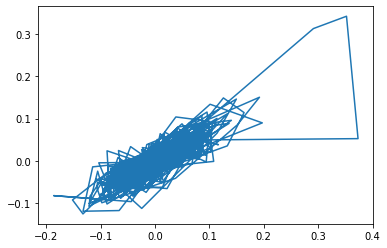

In [319]:
plt.plot(Y,predicted)

In [259]:
predicted

array([[-0.00059362],
       [ 0.00110799],
       [-0.00013895],
       ...,
       [-0.00056423],
       [ 0.00082215],
       [-0.00059873]])

In [322]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

#     # Regression metrics
#     explained_variance=metrics.explained_variance_score(y_true, y_pred)
#     mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
#     mse=metrics.mean_squared_error(y_true, y_pred) 
# #     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
#     median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

#     print('explained_variance: ', round(explained_variance,4))    
# #     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
#     print('r2: ', round(r2,4))
#     print('MAE: ', round(mean_absolute_error,4))
#     print('MSE: ', round(mse,4))
#     print('RMSE: ', round(np.sqrt(mse),4))
    
    return r2

In [218]:
gamma

matrix([[ 0.0014278 ],
        [ 0.04849405],
        [-0.07261609],
        [-0.01405602],
        [-0.03199561],
        [ 0.04020317],
        [ 0.01870094],
        [ 0.04457568],
        [ 0.00353308],
        [ 0.03315817],
        [ 0.02783335]])

In [94]:
Y.shape

(590, 1)

In [16]:
gamma = np.matrix(np.linalg.inv(X*X.T))*X*Y

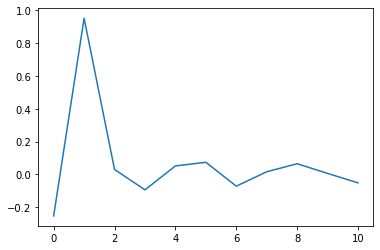

In [92]:
import matplotlib.pyplot as plt
plt.plot(gamma)
plt.show()

In [10]:
sum(gamma)

matrix([[0.68122262]])

In [22]:
from statsmodels.regression.linear_model import OLS
from statsmodels.multivariate.multivariate_ols import _MultivariateOLS

In [76]:
data = pd.concat([pd.DataFrame(X.T), pd.DataFrame(Y)],axis=1)
data.columns = ['sigma_'+str(x) for x in range(p+1)]+['Y']

formula = ' + '.join(data.columns[:-1]) + ' ~ Y'
print(formula)

mod = _MultivariateOLS.from_formula(formula, data)
results = mod.fit(method='svd')

print(str(results.))

sigma_0 + sigma_1 + sigma_2 + sigma_3 + sigma_4 + sigma_5 + sigma_6 + sigma_7 + sigma_8 + sigma_9 + sigma_10 ~ Y


NotImplementedError: 

In [58]:
formula = ' + '.join(data.columns[:-1]) + ' ~ Y'

'sigma_0 + sigma_1 + sigma_2 + sigma_3 + sigma_4 + sigma_5 + sigma_6 + sigma_7 + sigma_8 + sigma_9 + sigma_10 ~ Y'

In [35]:
print(r)

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
           x0             Value    Num DF  Den DF   F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0009 11.0000 579.0000 57711.9359 0.0000
         Pillai's trace    0.9991 11.0000 579.0000 57711.9359 0.0000
 Hotelling-Lawley trace 1096.4271 11.0000 579.0000 57711.9359 0.0000
    Roy's greatest root 1096.4271 11.0000 579.0000 57711.9359 0.0000



In [24]:
print(X.shape,Y.shape)

(11, 590) (590, 1)


In [51]:
data.columns = ['sigma_'+str(x) for x in range(p+1)]+['Y']

In [52]:
data

,sigma_0,sigma_1,sigma_2,sigma_3,sigma_4,sigma_5,sigma_6,sigma_7,sigma_8,sigma_9,sigma_10,Y
0,1.0,-26.072386,-26.969849,-26.420663,-26.684492,-27.187959,-27.375067,-27.230273,-27.468163,-27.797582,-27.435046,-27.617188
1,1.0,-26.969849,-26.420663,-26.684492,-27.187959,-27.375067,-27.230273,-27.468163,-27.797582,-27.435046,-27.617188,-27.663920
2,1.0,-26.420663,-26.684492,-27.187959,-27.375067,-27.230273,-27.468163,-27.797582,-27.435046,-27.617188,-27.663920,-27.559511
3,1.0,-26.684492,-27.187959,-27.375067,-27.230273,-27.468163,-27.797582,-27.435046,-27.617188,-27.663920,-27.559511,-27.120899
4,1.0,-27.187959,-27.375067,-27.230273,-27.468163,-27.797582,-27.435046,-27.617188,-27.663920,-27.559511,-27.120899,-26.415697
5,1.0,-27.375067,-27.230273,-27.468163,-27.797582,-27.435046,-27.617188,-27.663920,-27.559511,-27.120899,-26.415697,-26.622952
6,1.0,-27.230273,-27.468163,-27.797582,-27.435046,-27.617188,-27.663920,-27.559511,-27.120899,-26.415697,-26.622952,-27.095050
7,1.0,-27.468163,-27.797582,-27.435046,-27.617188,-27.663920,-27.559511,-27.120899,-26.415697,-26.622952,-27.095050,-27.288046
8,1.0,-27.797582,-27.435046,-27.617188,-27.663920,-27.559511,-27.120899,-26.415697,-26.622952,-27.095050,-27.288046,-27.112528
9,1.0,-27.435046,-27.617188,-27.663920,-27.559511,-27.120899,-26.415697,-26.622952,-27.095050,-27.288046,-27.112528,-26.978588


In [77]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

In [79]:
regr = linear_model.LinearRegression()
regr.fit(X.T,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
regr.coef_

array([[ 0.        , -0.05118605,  0.00644148,  0.06549344,  0.01650044,
        -0.07133987,  0.07435777,  0.0521858 , -0.09371437,  0.03063915,
         0.95269513]])

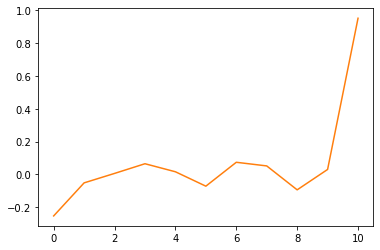

In [82]:
plt.plot(regr.coef_)
plt.plot(gamma)

In [83]:
gamma

matrix([[-0.25271587],
        [-0.05118605],
        [ 0.00644148],
        [ 0.06549344],
        [ 0.01650044],
        [-0.07133987],
        [ 0.07435777],
        [ 0.0521858 ],
        [-0.09371437],
        [ 0.03063915],
        [ 0.95269513]])